In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import count_nonzero

In [2]:
df = pd.read_csv('Recoded_Data.csv')
df.head()

,CONSTUITUENCY,WARD,RESIDENCE,AGEOFMOTHER,LEVELOFEDUCATION,MARITALSTATUS,UCCUPATIONALSTATUS,DISTANCETOHOSPITAL,MODEOFTRANSPORT,CHOSETOCOMETOFACILITY,...,GESTATIONPERIOD,WEIGHT,BIRTHCOMPLICATIONS,AFTERBIRTHCOMPLICATIONS,ADMISSIONREASON,MEDICALDIAGNOSIS,DURATIONOFSTAY,DURATION,AGE,DISCHARGEOUTCOME
0,WAJIR EAST,TOWNSHIP,Urban,20.0,No Formal Education,Married,Unemployed,5.0,Taxi,Availability of healthcare personnel,...,38.0,3.5,Yes,No,BIRTH ASPHYXIA,Perinatal asphyxia,1.0,Short,3.0,Alive
1,WAJIR WEST,HADHAHO,Rural,22.0,No Formal Education,Married,Unemployed,4.0,Taxi,Availability of healthcare personnel,...,40.0,3.3,Yes,Yes,SEVERE BIRTH ASPHIXIA,Perinatal asphyxia,1.0,Short,4.0,Alive
2,WAJIR EAST,JOGOO,Rural,24.0,Primary,Married,Unemployed,5.0,Taxi,Availability of healthcare personnel,...,38.0,3.2,No,Yes,FEVER,NaN,1.0,Short,3.0,Alive
3,WAJIR EAST,TOWNSHIP,Urban,21.0,Secondary,Married,Self-Employed (Business),5.0,Taxi,"Availability of drugs,Availability of healthca...",...,38.0,3.0,Yes,No,SEVERE BIRTH ASPHIXIA,Perinatal asphyxia,1.0,Short,3.0,Alive
4,WAJIR WEST,HADHAHO,Rural,20.0,No Formal Education,Married,Unemployed,5.0,Taxi,Availability of drugs,...,37.0,2.5,Yes,No,SEVERE BIRTH ASPHIXIA,Perinatal asphyxia,2.0,Short,2.0,Alive


In [3]:
df.drop([122,123,124,125,126], axis=0, inplace=True)

In [4]:
df.drop(['MARTENALOFRISKFACTORS', 'OBSTRETICCOMPLICATIONS', 'MARITALSTATUS', 'LIFESTYLE', 'REASONIFNOT' ], inplace= True, axis = 1)


In [5]:
df.sample()

,CONSTUITUENCY,WARD,RESIDENCE,AGEOFMOTHER,LEVELOFEDUCATION,UCCUPATIONALSTATUS,DISTANCETOHOSPITAL,MODEOFTRANSPORT,CHOSETOCOMETOFACILITY,QUALITYOFSERVICE,...,GESTATIONPERIOD,WEIGHT,BIRTHCOMPLICATIONS,AFTERBIRTHCOMPLICATIONS,ADMISSIONREASON,MEDICALDIAGNOSIS,DURATIONOFSTAY,DURATION,AGE,DISCHARGEOUTCOME
16,WAJIR EAST,WAGBERI,Urban,19.0,No Formal Education,Unemployed,4.0,Taxi,Availability of healthcare personnel,Neutral,...,38.0,3.4,Yes,No,UNDERWEIGHT CHILD,Perinatal asphyxia,3.0,Short,3.0,Alive


In [6]:
df.columns

Index(['CONSTUITUENCY', 'WARD', 'RESIDENCE', 'AGEOFMOTHER', 'LEVELOFEDUCATION',
       'UCCUPATIONALSTATUS', 'DISTANCETOHOSPITAL', 'MODEOFTRANSPORT',
       'CHOSETOCOMETOFACILITY', 'QUALITYOFSERVICE', 'STAFFATTITUDE',
       'PAYEROFHOSPITAL', 'PREVIOUSDELIVERIES', 'ALIVEPREVIOUSDELIVERIES',
       'DEADPREVIOUSDELIVERIES', 'DELIVERIESATHEALTHFACILITY',
       'DELIVERIESATHOME', 'BIRTHINTERVAL', 'DISEASESUFFERED',
       'DISEASEDURINGPREGNANCY', 'ANCATTENDED', 'MULTIPLEGESTATION',
       'NUMBEROFGESTATIONS- Birth Rank', 'MODEOFDELIVERY',
       'COMPLICATIONSDURINGDFELIVERY', 'AFTERDELIVERY', 'GENDER',
       'PREGNANCYCOMPLICATIONS', 'GESTATIONPERIOD', 'WEIGHT',
       'BIRTHCOMPLICATIONS', 'AFTERBIRTHCOMPLICATIONS', 'ADMISSIONREASON',
       'MEDICALDIAGNOSIS', 'DURATIONOFSTAY', 'DURATION', 'AGE',
       'DISCHARGEOUTCOME'],
      dtype='object')

In [7]:
df.describe()

,AGEOFMOTHER,DISTANCETOHOSPITAL,PREVIOUSDELIVERIES,ALIVEPREVIOUSDELIVERIES,DEADPREVIOUSDELIVERIES,DELIVERIESATHOME,BIRTHINTERVAL,ANCATTENDED,NUMBEROFGESTATIONS- Birth Rank,GESTATIONPERIOD,WEIGHT,DURATIONOFSTAY,AGE
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,23.721311,3.418033,1.795082,1.639344,0.155738,0.303279,1.229508,3.024590,0.016393,34.713115,2.786885,5.532787,4.319672
std,4.651956,1.225353,1.991463,1.710761,0.716055,0.832097,1.204584,1.222807,0.127507,3.580202,0.646791,2.937881,4.295426
min,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000,1.000000,0.000000
25%,20.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,32.000000,2.425000,3.000000,2.000000
50%,23.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.500000,3.000000,0.000000,36.000000,2.900000,5.000000,3.000000
75%,26.000000,4.000000,3.000000,3.000000,0.000000,0.000000,2.000000,4.000000,0.000000,38.000000,3.200000,7.000000,4.000000
max,37.000000,5.000000,8.000000,6.000000,5.000000,5.000000,6.000000,5.000000,1.000000,40.000000,4.300000,14.000000,27.000000


In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.isnull().sum().sum()

0

In [10]:
# Constituency with highest number of deliveries

df['CONSTUITUENCY'].value_counts()

WAJIR EAST     77
WAJIR WEST     18
TARBAJ          2
WAJIR SOUTH     2
ELDAS           1
Name: CONSTUITUENCY, dtype: int64

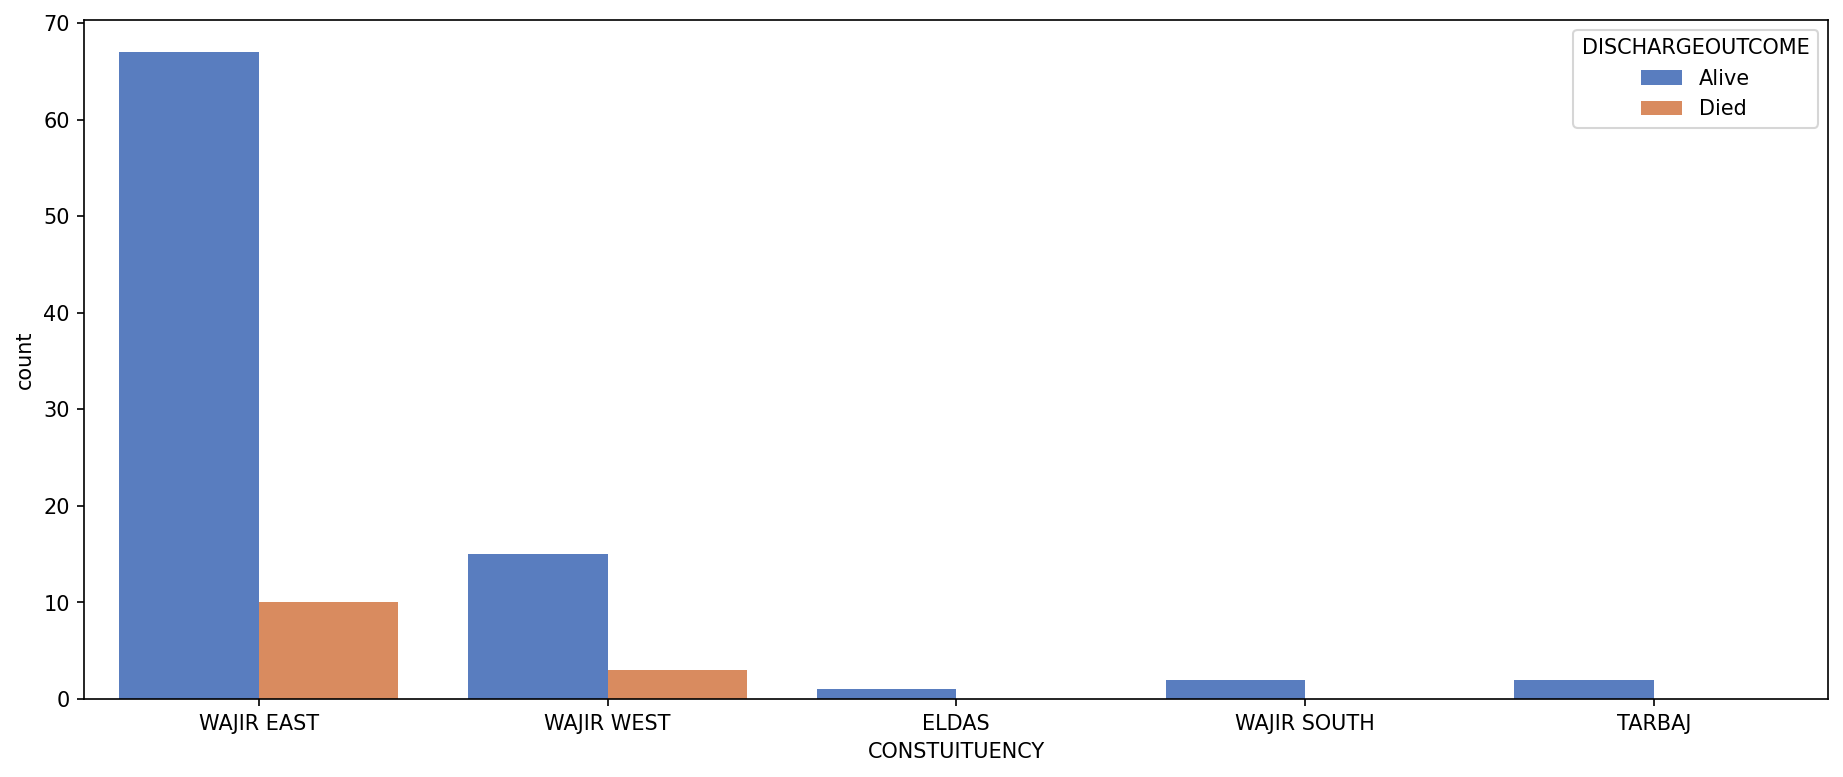

In [11]:

plt.figure(figsize = (15, 6), dpi =150)

sns.countplot(x="CONSTUITUENCY", hue="DISCHARGEOUTCOME",data=df, palette="muted")

plt.show()

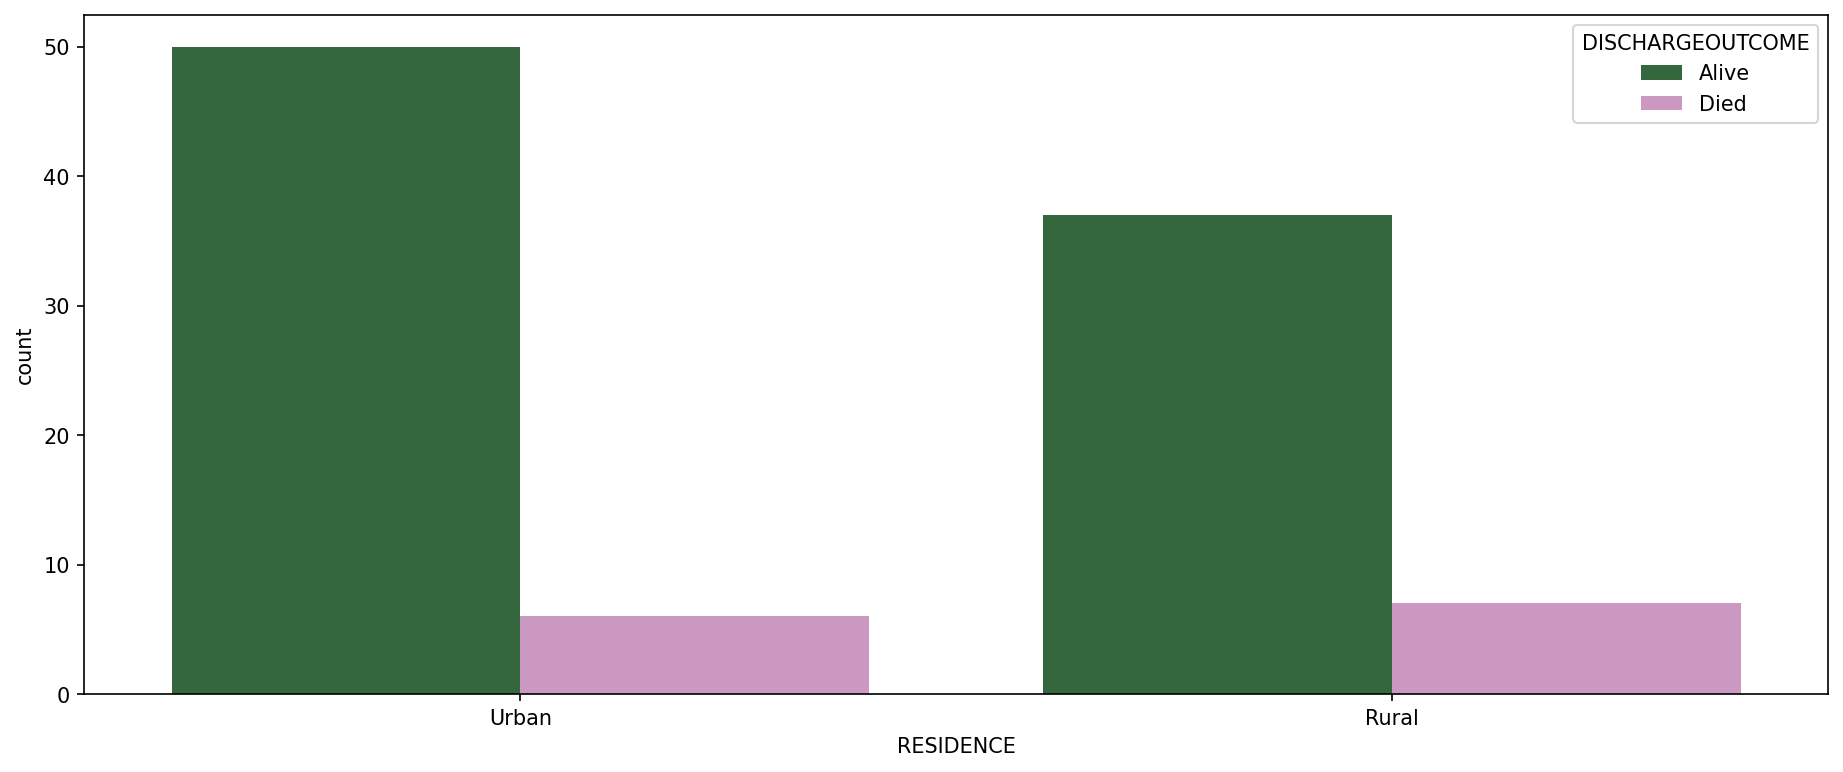

In [12]:
# Comparison between urban and rural mortality rates

plt.figure(figsize = (15, 6), dpi =150)

sns.countplot(x="RESIDENCE", hue="DISCHARGEOUTCOME",data=df, palette="cubehelix")

plt.show()

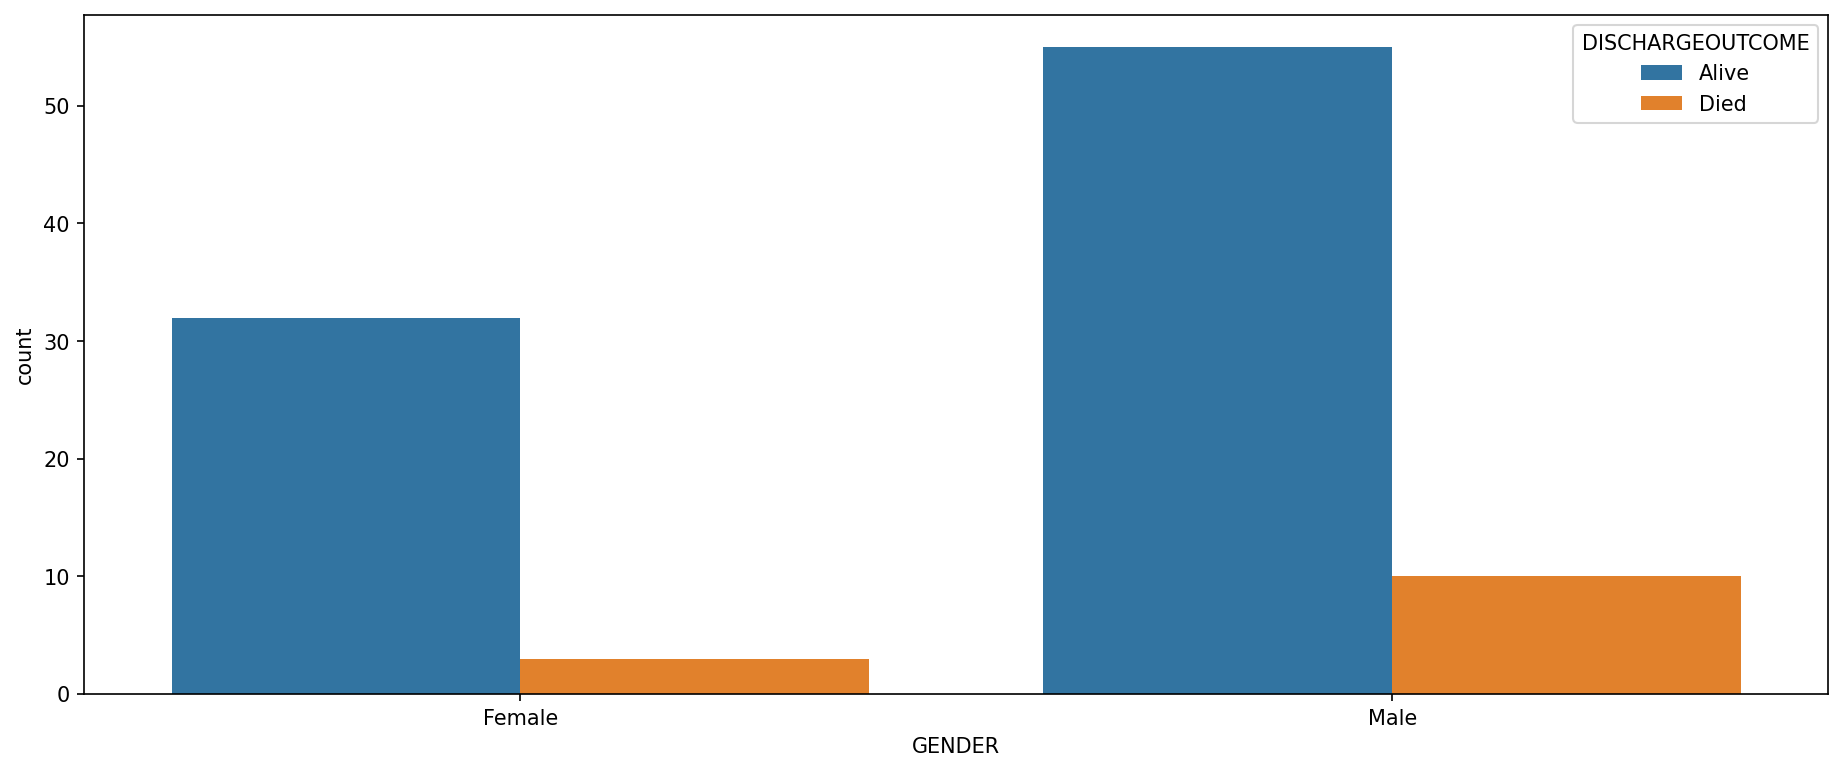

In [13]:
# Comparison between gender of the child and the mortality

plt.figure(figsize = (15, 6), dpi =150)

sns.countplot(x="GENDER", hue="DISCHARGEOUTCOME",data=df, palette="tab10")

plt.show()



#### There were more male infants delivered compared to female. Consequently, the male infants had a higher mortality rate.

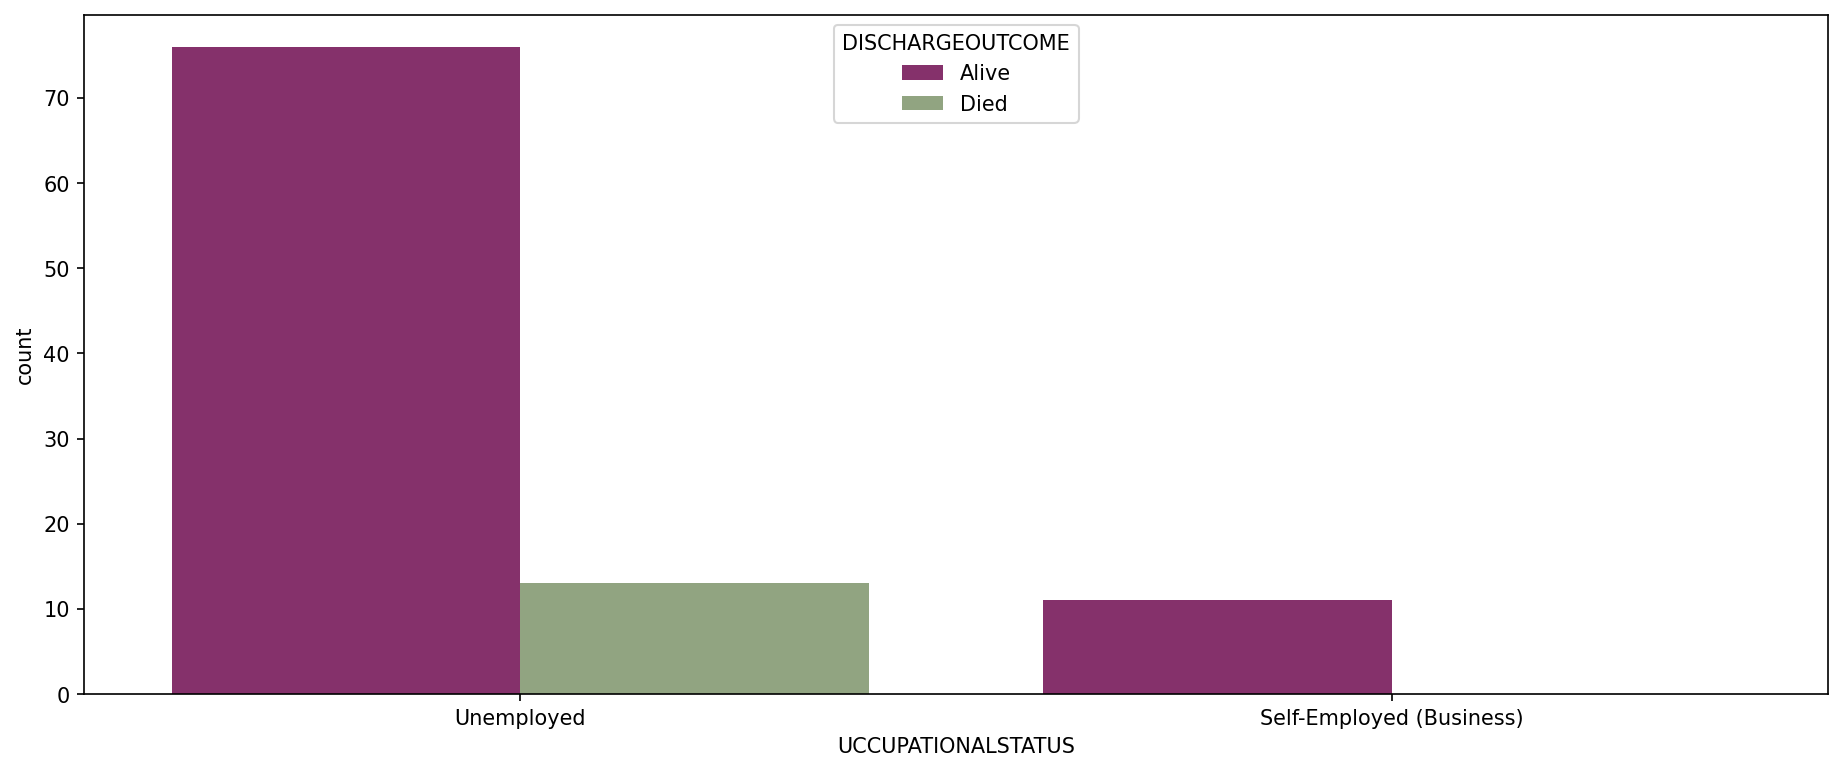

In [14]:
# Check whether occupational status has an effect on mortality rate

plt.figure(figsize = (15, 6), dpi =150)

sns.countplot(x="UCCUPATIONALSTATUS", hue="DISCHARGEOUTCOME",data=df, palette=['#932371',"#91AA7B"])

plt.show()

#### From the visual above, the mortality rate was higher for unemployed individuals. The mortality rate for employed people was negligible.

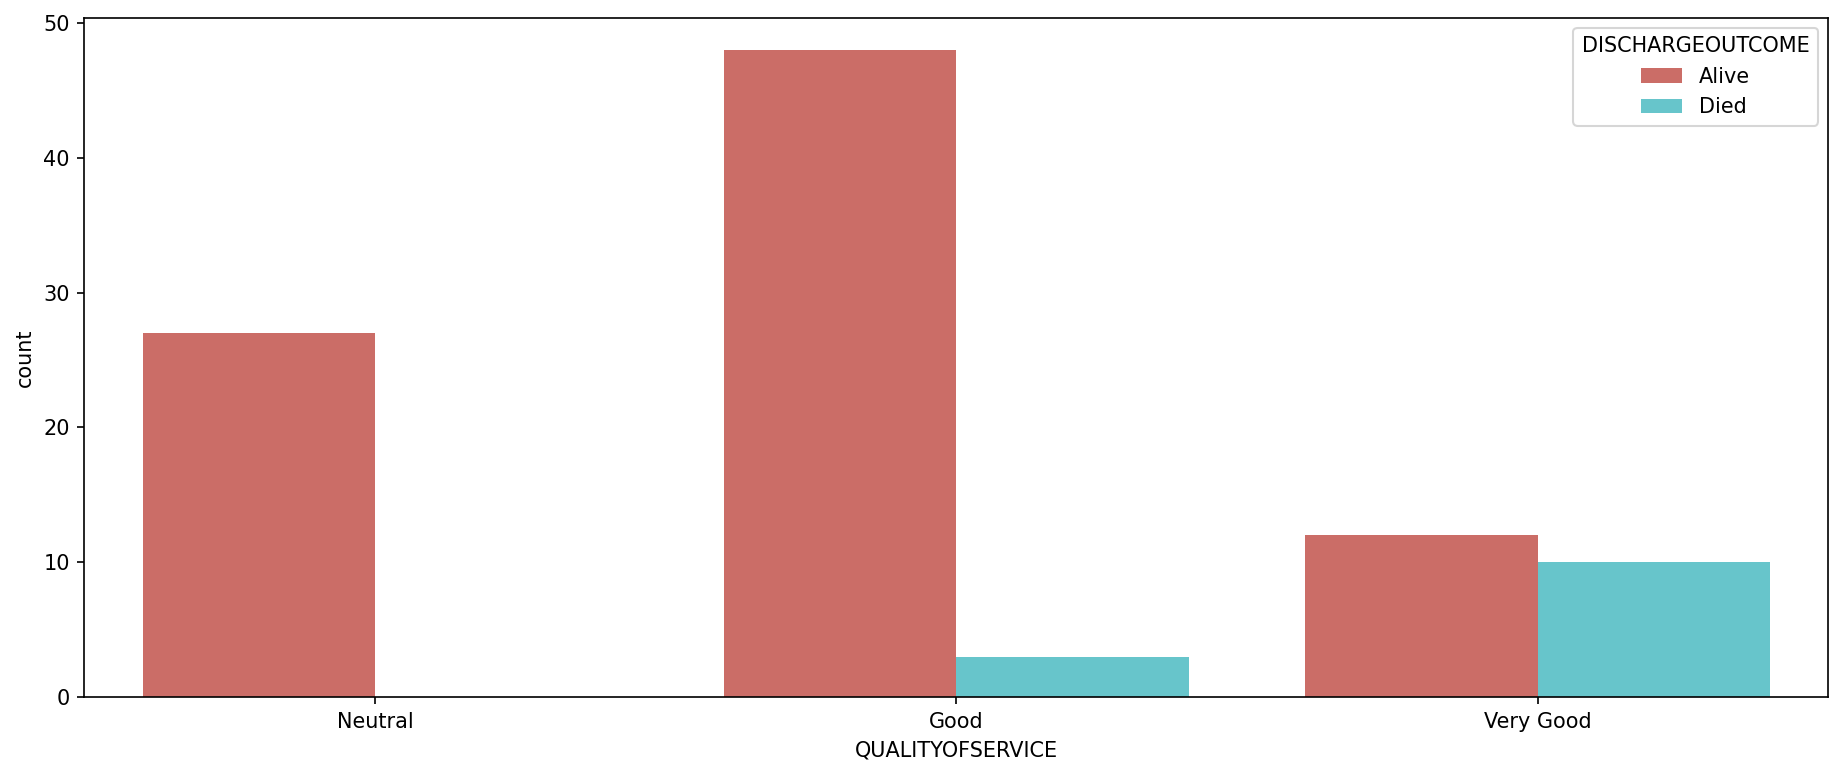

In [15]:
# Quality of service to mortality rate

plt.figure(figsize = (15, 6), dpi =150)

sns.countplot(x="QUALITYOFSERVICE", hue="DISCHARGEOUTCOME",data=df, palette="hls")

plt.show()

#### The quality of service was not a considerable factor to the rate of mortality because from the visualisation, the column for 'very good' had the highest mortality rate

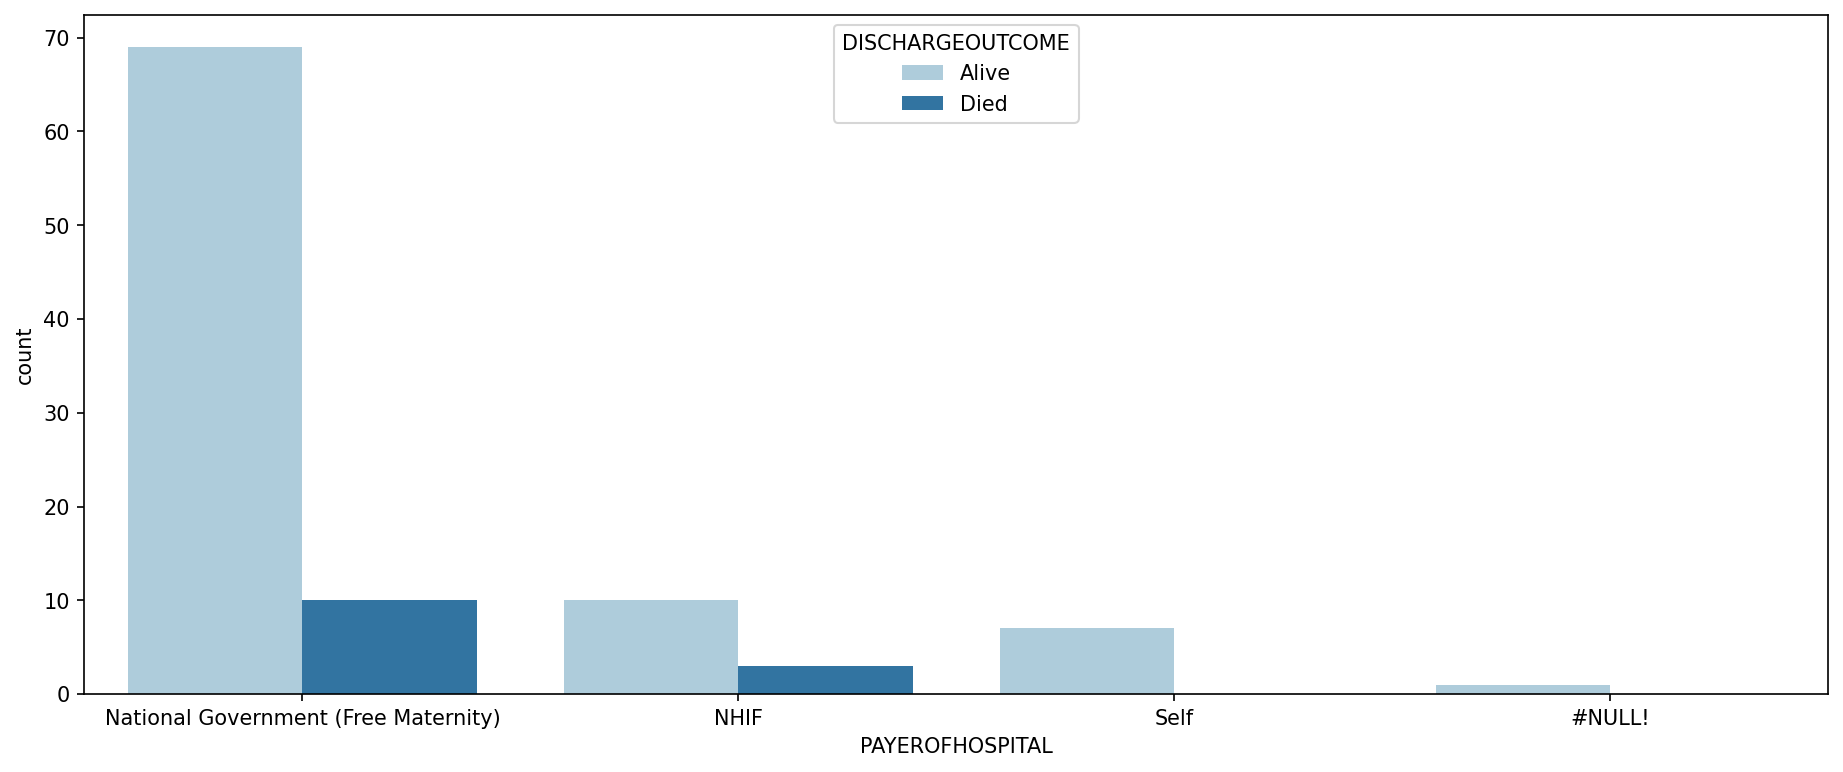

In [17]:
# Payer of hospital to the mortality rate

df.dropna(axis=0, inplace=True)

plt.figure(figsize = (15, 6), dpi =150)

sns.countplot(x="PAYEROFHOSPITAL", hue="DISCHARGEOUTCOME",data=df, palette="Paired")

plt.show()

#### The mortality rate was higher among individuals who used the national government as their payer. Studies depict that since maternal services are free, the quality of service is not up-to standard.

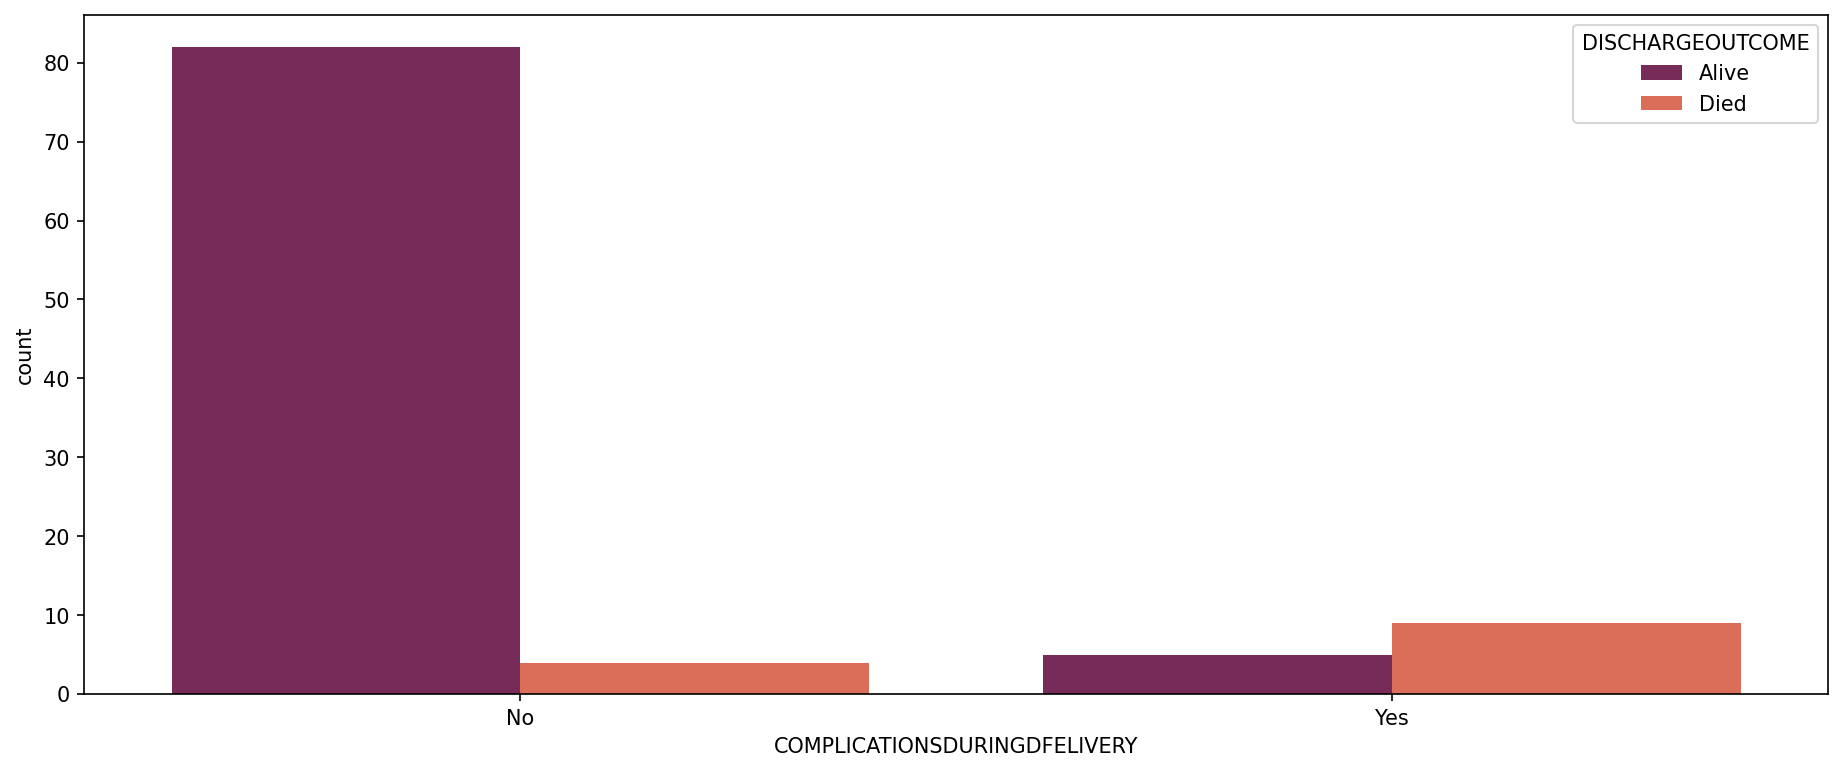

In [18]:
# Complications during delivery to the mortality rate

df.dropna(axis=0, inplace=True)

plt.figure(figsize = (15, 6), dpi =150)

sns.countplot(x="COMPLICATIONSDURINGDFELIVERY", hue="DISCHARGEOUTCOME",data=df, palette="rocket")

plt.show()

#### From the visual, there were more infant deaths when a mother had complications during delivery

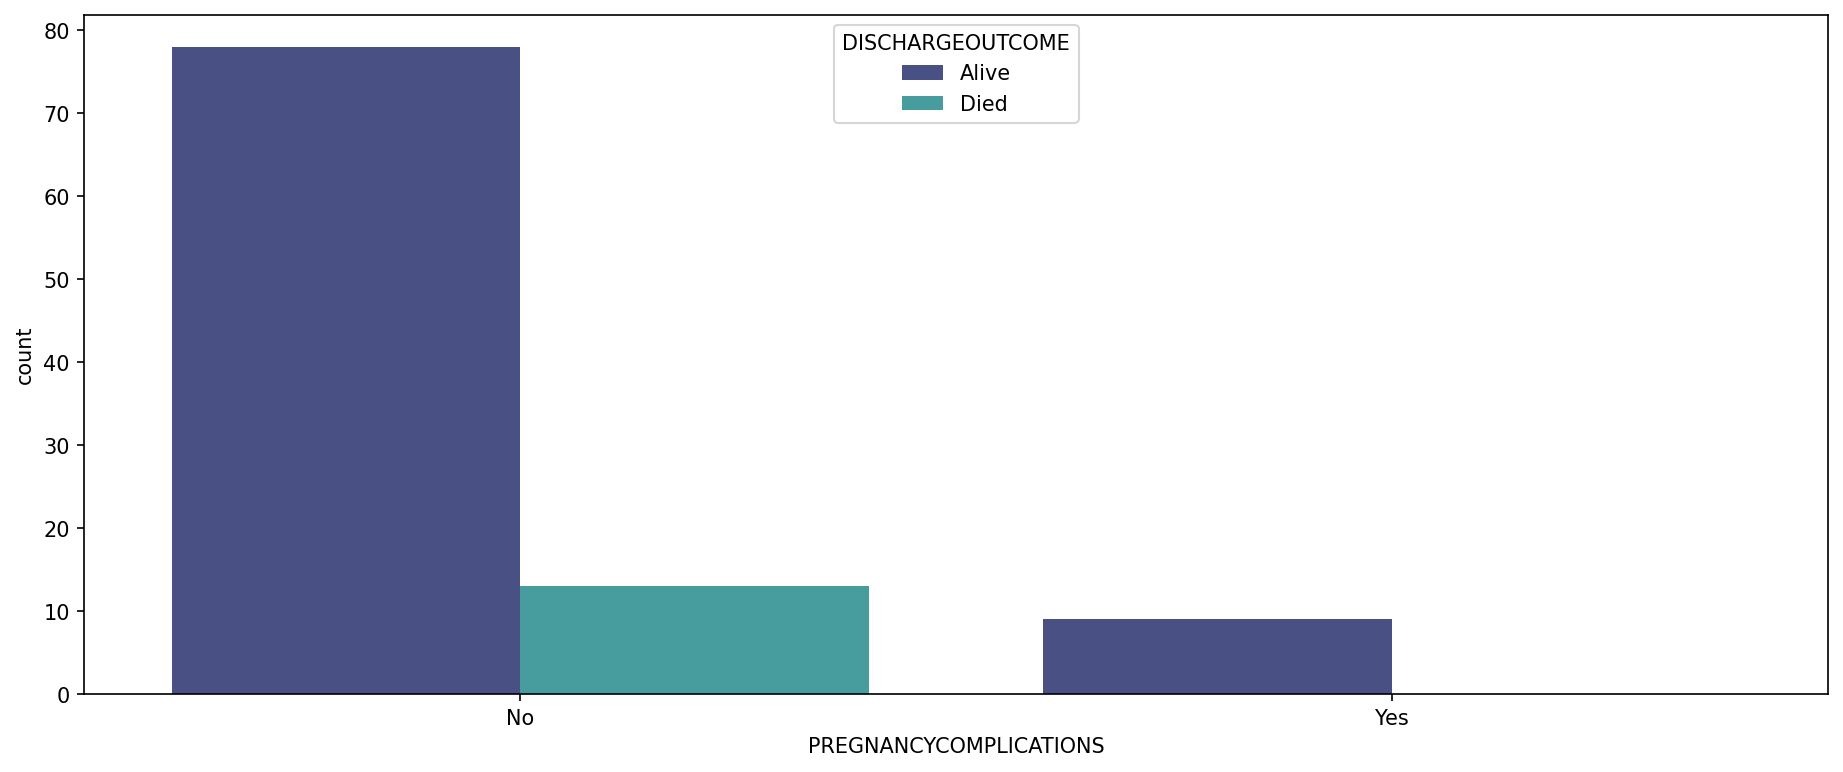

In [19]:
# Pregnancy Complications to the mortality rate

df.dropna(axis=0, inplace=True)

plt.figure(figsize = (15, 6), dpi =150)
colors = sns.color_palette('pastel')[0:5]

sns.countplot(x="PREGNANCYCOMPLICATIONS", hue="DISCHARGEOUTCOME",data=df, palette="mako")

plt.show()

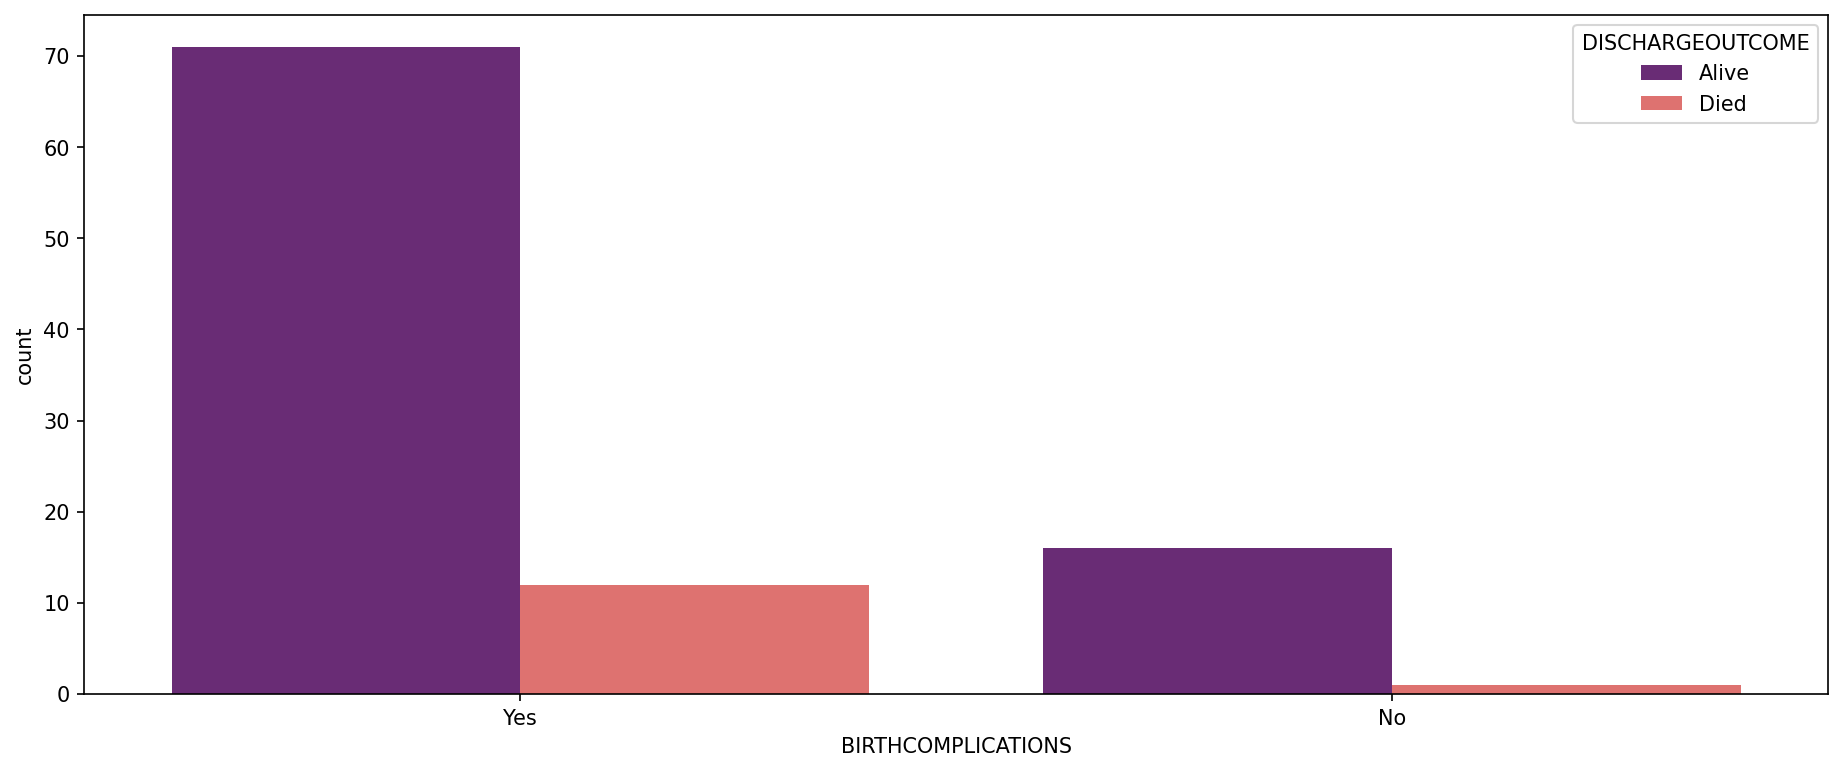

In [20]:
# Birth Complications to the mortality rate

df.dropna(axis=0, inplace=True)

plt.figure(figsize = (15, 6), dpi =150)
colors = sns.color_palette('pastel')[0:5]

sns.countplot(x="BIRTHCOMPLICATIONS", hue="DISCHARGEOUTCOME",data=df, palette="magma")

plt.show()

#### There were more infant deaths whenever birth complications arose

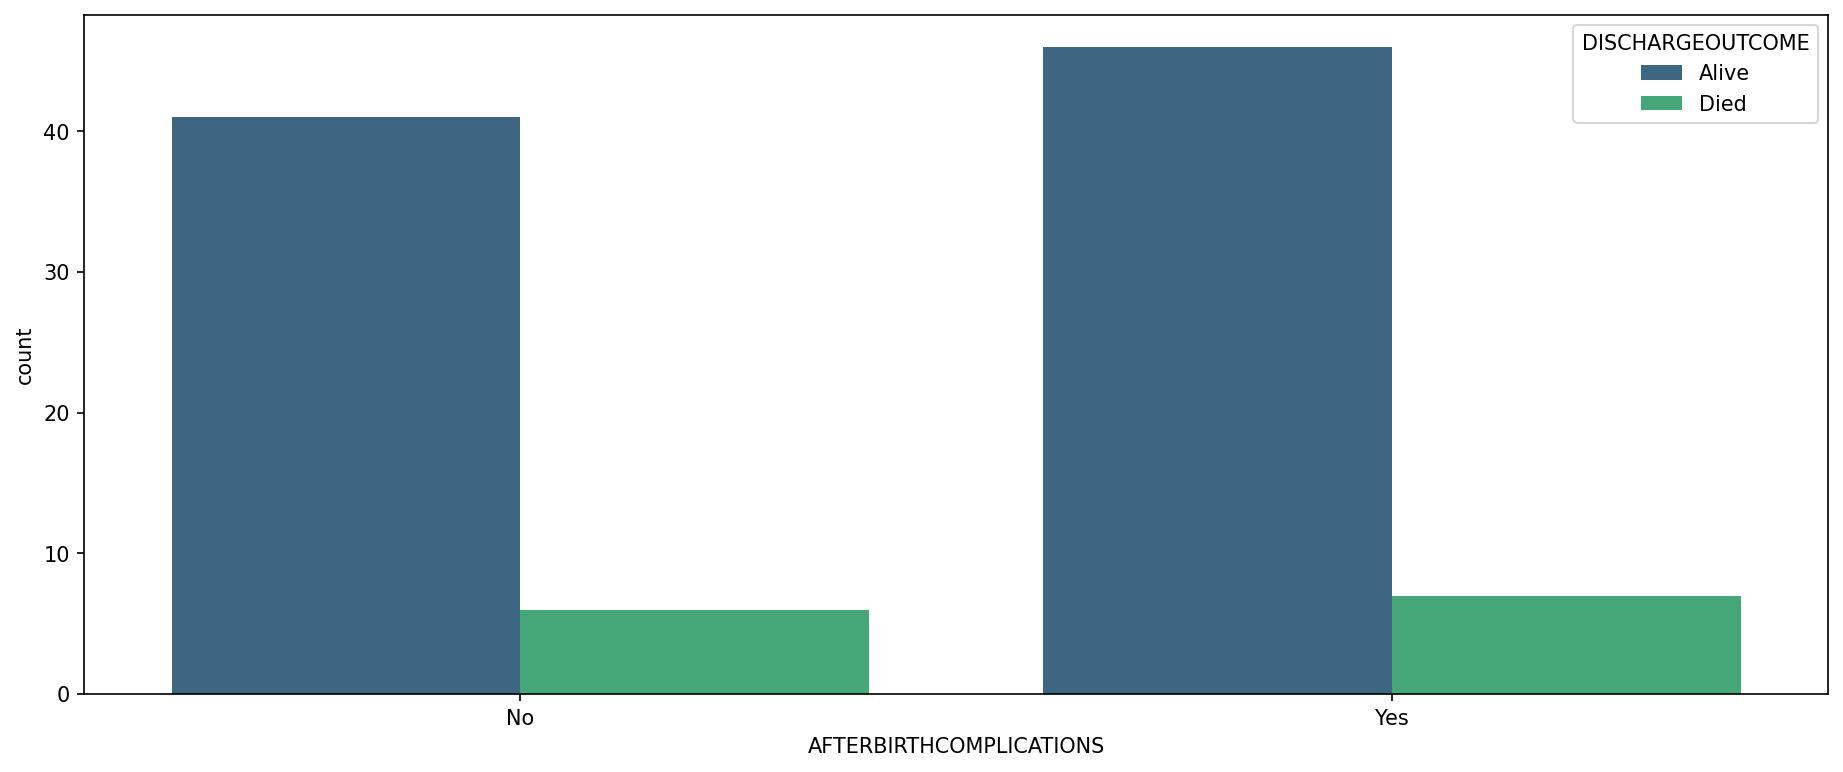

In [21]:
# After Birth Complications to the mortality rate

df.dropna(axis=0, inplace=True)

plt.figure(figsize = (15, 6), dpi =150)

sns.countplot(x="AFTERBIRTHCOMPLICATIONS", hue="DISCHARGEOUTCOME",data=df, palette="viridis")

plt.show()

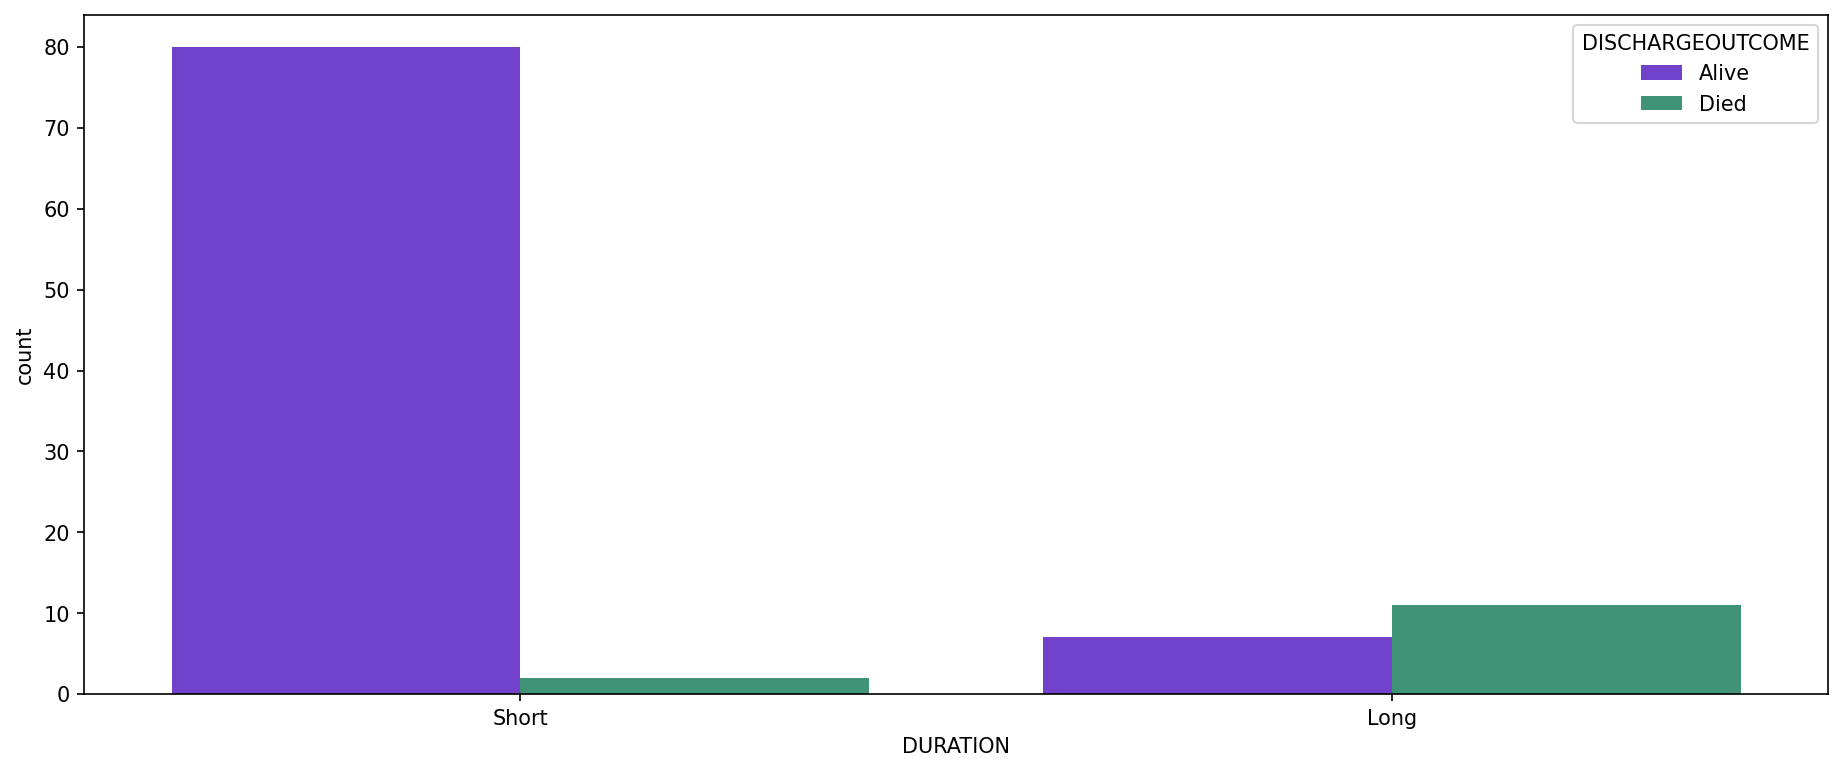

In [22]:
# Duration of stay to the mortality rate

df.dropna(axis=0, inplace=True)

plt.figure(figsize = (15, 6), dpi = 150)

sns.countplot(x="DURATION", hue="DISCHARGEOUTCOME",data=df, palette=['#6A2AE1','#31A17B'])

plt.show()

#### The duration of stay was mostly caused by the infant being diagnosed with a specific disease/infection. The longer the stay at hospital after birth, the higher the chances of mortality of the infant.